In [92]:
import numpy as np
from scipy import special
from scipy import optimize
from math import pi,sqrt
from quantum.utils import plotting as PLT

def norm(vec : np.ndarray):
    vec = np.asarray(vec)
    alpha = vec[:len(vec)//2]
    coeff = vec[len(vec)//2:]
    A = alpha[:,None] * alpha
    B = alpha[:,None] + alpha
    C = coeff[:,None] * coeff
    nrm = 2**(3/2)* A**(3/4)/B**(3/2) * C
    nrm = np.sum(nrm)
    return nrm

def correlation(vec : np.ndarray):
    vec = np.asarray(vec)
    alpha = vec[:len(vec)//2]
    coeff = vec[len(vec)//2:]
    S = -2*np.sqrt(alpha) + np.exp(0.25/alpha)*sqrt(pi)*(1 + 2*alpha)*special.erfc(0.5/np.sqrt(alpha))
    S /= 4*2**(1/4)*pi**(5/4)*alpha**(7/4)
    return 4*pi*np.sum( coeff * S ) / norm(vec)

def slater(r):
    return np.exp(-r) * sqrt(1./pi)

def cgf(r,vec):
    vec = np.asarray(vec)
    alpha = vec[:len(vec)//2]
    coeff = vec[len(vec)//2:]
    f=np.zeros_like(r) 
    for i in range(len(coeff)):
        f += coeff[i] *(2*alpha[i]/pi)**(3/4)* np.exp(-alpha[i]*r**2)
    return f


for x in [0.1,0.2,0.27095,0.3,0.4,0.5]:
    print('{:0.05f},{:0.5f}'.format(x, correlation([x,1])))


0.10000,0.86421
0.20000,0.96730
0.27095,0.97840
0.30000,0.97716
0.40000,0.96063
0.50000,0.93548


In [63]:
v=[0.151623,0.851819,0.678914,0.430129]
norm(v), correlation(v)

(1.0000012960111682, 0.9984190559008749)

In [72]:
sol = optimize.differential_evolution(lambda x : -correlation(x), bounds=[(0.05,1.0),(0.05,1.0),(0.01,1.0),(0.01,1.0)],
                        constraints=optimize.NonlinearConstraint(lambda x : np.abs(1-norm(x)), 0.,1e-6),
                        maxiter=10000,popsize=30)
display(sol.x)
print(norm(sol.x),correlation(sol.x))

/opt/python/anaconda3/envs/pmp/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


array([0.15161996, 0.8517832 , 0.67889979, 0.43014168])

1.0000000142046572 0.9984196957806669


In [75]:
sol = optimize.differential_evolution(lambda x : -correlation(x), bounds=[(0.05,10.0),(0.05,10.0),(0.05,10.0),(0.01,1.0),(0.01,1.0),(0.01,1.0)],
                        constraints=optimize.NonlinearConstraint(lambda x : np.abs(1-norm(x)), 0.,1e-6),
                        maxiter=10000,popsize=30)
display(sol.x)
print(norm(sol.x),correlation(sol.x))

array([0.72556577, 0.23990455, 2.96548664, 0.01017306, 0.95267945,
       0.09201053])

1.0000008801657643 0.9883953483201942


In [80]:
sol = optimize.minimize(lambda x : -correlation(x),x0=np.random.uniform(size=6), bounds=[(0.05,10.0),(0.05,10.0),(0.05,10.0),(0.01,1.0),(0.01,1.0),(0.01,1.0)],
                        constraints=optimize.NonlinearConstraint(lambda x : np.abs(1-norm(x)), 0.,1e-6))
sol

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.9986829380895975
       x: [ 1.441e-01  3.456e-01  9.193e-01  6.123e-01  1.249e-01
            3.730e-01]
     nit: 27
     jac: [ 6.477e-01 -2.111e-02 -9.263e-02  9.291e-01  9.678e-01
            8.272e-01]
    nfev: 200
    njev: 27

In [83]:
v=[0.109818,0.405771,2.22766,0.444635,0.535328,0.154329]
norm(v), correlation(v)

(1.0000014259978642, 0.9998340233713282)

Text(0.5, 0, 'r [a.u.]')

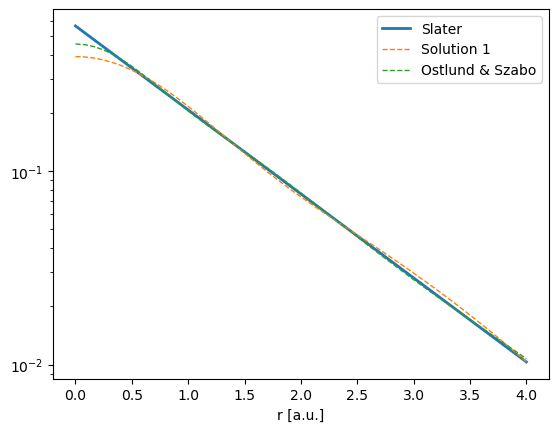

In [99]:
fig,ax=PLT.subplots()
r = np.linspace(0,4)
ax.plot(r, slater(r),label='Slater',lw=2)
ax.plot(r, cgf(r,sol.x),label='Solution 1',lw=1,ls='--')
ax.plot(r, cgf(r,v),label='Ostlund & Szabo',lw=1,ls='--')
ax.set_yscale('log')
ax.legend()
ax.set_xlabel('r [a.u.]')